In [1]:
import fastf1 as ff1
import datetime
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd

In [2]:
# Enable the cache by providing the name of the cache folder
ff1.Cache.enable_cache('cache')

In [3]:
year, grand_prix, session = 2023, 'Bahrain', 'Q'

quali = ff1.get_session(year, grand_prix, session)
quali.load() # This is new with Fastf1 v.2.2

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/Users/kepstein/.pyenv/versions/3.9.4/envs/fastf1/lib/python3.9/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/Users/kepstein/.pyenv/versions/3.9.4/envs/fastf1/lib/python3.9/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/Users/kepstein/.pyenv/versions/3.9.4/envs/fastf1/lib/python3.9/site-packages/fastf1/core.py:1415: FutureWarn

In [22]:
drivers = [
    {"number" : "1","identifier" : "VER","name" : "Max Verstappen"},
    {"identifier" : "PER","number" : "11","name" : "Sergio Perez"},
    {"name" : "Charles Leclerc","identifier" : "LEC","number" : "16"},
    {"number" : "55","name" : "Carlos Sainz","identifier" : "SAI"},
    {"number" : "14","identifier" : "ALO","name" : "Fernando Alonso"},
    {"identifier" : "RUS","name" : "George Russell","number" : "63"},
    {"identifier" : "HAM","name" : "Lewis Hamilton","number" : "44"},
    {"name" : "Lance Stroll","identifier" : "STR","number" : "18"},
    {"identifier" : "OCO","number" : "31","name" : "Esteban Ocon"},
    {"number" : "27","identifier" : "HUL","name" : "Nico Hulkenberg"},
    {"name" : "Lando Norris","identifier" : "NOR","number" : "4"},
    {"identifier" : "BOT","name" : "Valtteri Bottas","number" : "77"},
    {"identifier" : "ZHO","number" : "24","name" : "Zhou Guanyu"},
    {"number" : "22","name" : "Yuki Tsunoda","identifier" : "TSU"},
    {"name" : "Alexander Albon","identifier" : "ALB","number" : "23"},
    {"number" : "2","name" : "Logan Sargeant","identifier" : "SAR"},
    {"identifier" : "MAG","number" : "20","name" : "Kevin Magnussen"},
    {"identifier" : "PIA","number" : "81","name" : "Oscar Piastri"},
    {"identifier" : "DEV","name" : "Nyck De Vries","number" : "21"},
    {"identifier" : "GAS","name" : "Pierre Gasly","number" : "10"}
]
# drivers[0]["name"]
# filter(lambda driver: driver['identifier'] == 'VER', drivers)
list(filter(lambda driver: driver['identifier'] == 'VER', drivers))

[{'number': '1', 'identifier': 'VER', 'name': 'Max Verstappen'}]

In [43]:
chart_drivers = []
chart_laptimes = []
for driver in drivers:
        # print(driver["name"])
        driver_quali_laps = quali.laps.pick_driver(driver["identifier"])
        driver_fastest_lap = driver_quali_laps.pick_fastest()
        print(driver_fastest_lap.LapTime)
        chart_drivers.append(driver["identifier"])
        chart_laptimes.append(driver_fastest_lap.LapTime)
        print("{}: {}".format(driver["identifier"],str(driver_fastest_lap.LapTime)[11:]))


0 days 00:01:29.708000
VER: 1:29.708000
0 days 00:01:29.846000
PER: 1:29.846000
0 days 00:01:30
LEC: 1:30
0 days 00:01:30.154000
SAI: 1:30.154000
0 days 00:01:30.336000
ALO: 1:30.336000
0 days 00:01:30.340000
RUS: 1:30.340000
0 days 00:01:30.384000
HAM: 1:30.384000
0 days 00:01:30.836000
STR: 1:30.836000
0 days 00:01:30.984000
OCO: 1:30.984000
0 days 00:01:31.055000
HUL: 1:31.055000
0 days 00:01:31.381000
NOR: 1:31.381000
0 days 00:01:31.443000
BOT: 1:31.443000
0 days 00:01:31.473000
ZHO: 1:31.473000
0 days 00:01:32.510000
TSU: 1:32.510000
0 days 00:01:31.461000
ALB: 1:31.461000
0 days 00:01:31.652000
SAR: 1:31.652000
0 days 00:01:31.892000
MAG: 1:31.892000
0 days 00:01:32.101000
PIA: 1:32.101000
0 days 00:01:32.121000
DEV: 1:32.121000
0 days 00:01:32.181000
GAS: 1:32.181000


In [36]:
chart_laptimes

[Timedelta('0 days 00:01:29.708000'),
 Timedelta('0 days 00:01:29.846000'),
 Timedelta('0 days 00:01:30'),
 Timedelta('0 days 00:01:30.154000'),
 Timedelta('0 days 00:01:30.336000'),
 Timedelta('0 days 00:01:30.340000'),
 Timedelta('0 days 00:01:30.384000'),
 Timedelta('0 days 00:01:30.836000'),
 Timedelta('0 days 00:01:30.984000'),
 Timedelta('0 days 00:01:31.055000'),
 Timedelta('0 days 00:01:31.381000'),
 Timedelta('0 days 00:01:31.443000'),
 Timedelta('0 days 00:01:31.473000'),
 Timedelta('0 days 00:01:32.510000'),
 Timedelta('0 days 00:01:31.461000'),
 Timedelta('0 days 00:01:31.652000'),
 Timedelta('0 days 00:01:31.892000'),
 Timedelta('0 days 00:01:32.101000'),
 Timedelta('0 days 00:01:32.121000'),
 Timedelta('0 days 00:01:32.181000')]

TypeError: only integer scalar arrays can be converted to a scalar index

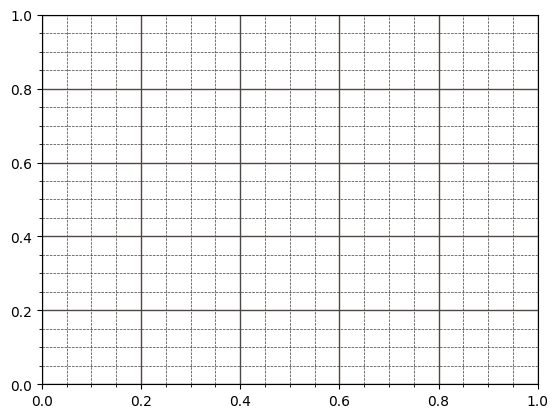

In [44]:
import matplotlib.pyplot as plt
import numpy as np

ff1.plotting.setup_mpl()

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(chart_drivers))

ax.barh(y_pos, chart_laptimes, align='center')
ax.set_yticks(y_pos, labels=chart_drivers)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('lap Time')
ax.set_title('How fast do you want to go today?')

plt.show()